In [11]:
import sys
import numpy as np
import scipy as sc
import scipy.linalg as la
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (8,10)
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.graph_objects as go
from scipy.optimize import minimize_scalar, minimize, shgo, basinhopping, differential_evolution, dual_annealing, rosen
#from scipy.misc import derivative
from matplotlib import cm
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from ipywidgets import FloatProgress
from IPython.display import display, HTML
from IPython.display import Image, SVG
#import time
%matplotlib notebook
%load_ext tikzmagic
#https://github.com/mkrphys/ipython-tikzmagic
#
#https://github.com/mkrphys/ipython-tikzmagic/issues/18
#On Ubuntu 18.04, I ran into the same issue. It seems the problem was because ImageMagick tightened 
#their security policy so that it prevented the generation of PNG file from the PDF file generated by latex. 
#To fix this problem, I edited /etc/ImageMagick-6/policy.xml, changing the following
#
#<policy domain="coder" rights="none" pattern="PDF />
#
#to
#
#<policy domain="coder" rights="read|write" pattern="PDF />
#
#http://blog.invibe.net/posts/2015-01-20-using-tikzmagic.html
#https://stackoverflow.com/questions/45671481/how-do-i-center-the-outputs-on-a-python-jupyter-notebook
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
#print(sc.__version__)
#print(numpy.__version__)

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


# (Global) Optimization Algorithms Test 

## Goal

## Test Functions for Optimization
(https://en.wikipedia.org/wiki/Test_functions_for_optimization)

### Rosenbrock Function
(https://en.wikipedia.org/wiki/Rosenbrock_function)

\begin{equation}
f(\vectr{x}) = \sum_{i=1}^{n-1} \left[ 100(x_{i+1} - x_{i}^2 )^{2} + (1-x_{i})^{2} \right]
\end{equation}

#### 2D

\begin{equation}
f(x,y) = b(y - x^{2})^{2} + (a-x)^{2}
\end{equation}

with usually $a=1$ and $b=100$, the global minimum is at $(x,y)=(a,a^{2})$ where $f(x,y)=0$. Trivial case $a=0$, the function is symmetric and the minimum at the origin. 

In [15]:
x_arr = np.linspace(-2.0, 2.0, 100, endpoint=True)
y_arr = np.linspace(-1.0, 3.0, 100, endpoint=True)

xv, yv = np.meshgrid(x_arr, y_arr)

function_mesh = np.zeros(shape=(100,100))

f = FloatProgress(min=0, max=40)
display(f)

for iy,y in enumerate(y_arr):
    for ix,x in enumerate(x_arr):
        function_mesh[iy][ix] = rosen(np.array([x,y]))
    f.value += 1

FloatProgress(value=0.0, max=40.0)

<IPython.core.display.Javascript object>


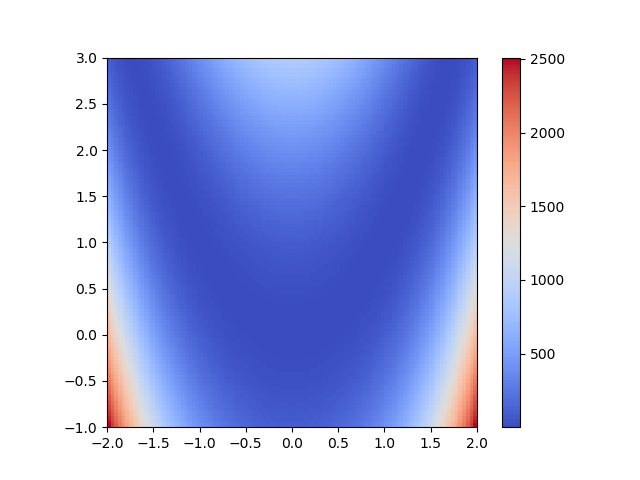

In [20]:
fig_functional_map = plt.figure()

im = plt.imshow(function_mesh, extent=(-2.0,2.0,-1.0,3.0), origin='lower', cmap=cm.coolwarm) # drawing the function
#plt.xticks([-np.pi,-0.5*np.pi,0.0,0.5*np.pi,np.pi],[r'$-\pi$',r'$-\frac{\pi}{2}$',r'$0$',r'$\frac{\pi}{2}$',r'$\pi$'])
#plt.yticks([-np.pi,-0.5*np.pi,0.0,0.5*np.pi,np.pi],[r'$-\pi$',r'$-\frac{\pi}{2}$',r'$0$',r'$\frac{\pi}{2}$',r'$\pi$'])
# adding the Contour lines with labels
#cset = plt.contour(kx, ky, Band_1,np.arange(-4,4.0,1.0),linewidths=2,cmap=cm.Set2)
#plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
#plt.colorbar(im) # adding the colobar on the right
plt.colorbar() # adding the colobar on the right
#plt.xticks([1,2])
# latex fashion title
plt.show()

<IPython.core.display.Javascript object>


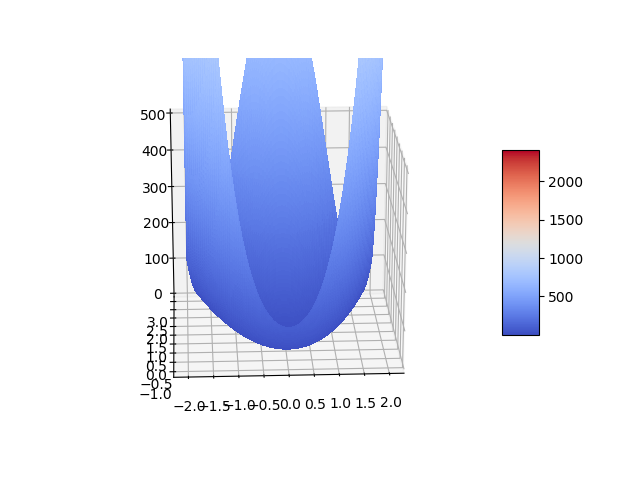

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xv, yv, function_mesh, rstride=1, cstride=1, 
                      cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(0.0, 500.0)
#ax.set_ylim(-1.0, 1.0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [24]:
bounds = [(0.0,2.0), (0.0, 2.0)]

In [27]:
%%timeit -n 1 -r 1
result = differential_evolution(rosen, bounds, maxiter=500, updating='deferred', workers=-1)
print(result.x,result.fun)

[1. 1.] 0.0
341 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [28]:
%%timeit -n 1 -r 1
result = shgo(rosen, bounds, n=100, iters=5, sampling_method='sobol')
print(result.x,result.fun)

[1. 1.] 3.658411273465293e-19
63.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [29]:
%%timeit -n 1 -r 1
result = dual_annealing(rosen, bounds, maxiter=500)
print(result.x,result.fun)

[0.99999895 0.99999828] 1.6180015783880788e-11
127 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
